## Support vector Classifier

### Lineal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

#generamos un conjunto de puntos de ejemplo
X = [1,5,1.5,8,1,9]
Y = [2,8,1.8,8,0.6,11]
data = np.array(list(zip(X,Y)))

#etiquetas de los puntos (supervised)
target = [0, 1, 0, 1, 0, 1]

#FASE DE APRENDIZAJE
classifier = svm.SVC(kernel="linear", C = 1.0) #kernel: lineal (hiperplano),polinomial, radial, red neuronal
#C: como de mal debe ser a clasificación o ajuste perfecto (ajuste manual en ML)
#los que caen dentro no están bien clasificados
##C rigidez a la hora de generar los pasillos
#a mayor valor, más estricto (pasillo de menor tamaño)
classifier.fit(data, target)

#TESTING
p = np.array([10.32, 12.67]).reshape(1,2)
print(p)
classifier.predict(p)

[[10.32 12.67]]


array([1])

* Modelo: w0 . x + w1 . y + e = 0
* Ecuación del hiperplano en 2D: y = a . x + b 

#### Representación gráfica

In [2]:
#w: pesos de cada categoría
w = classifier.coef_[0]

#a: pendiente
a = -w[0]/w[1]

#b: ordenada en el origen
b = - classifier.intercept_[0]/w[1]

In [3]:
#generar el hiperplano de 0 a 10
xx = np.linspace(0,10)
yy = a * xx + b

[]

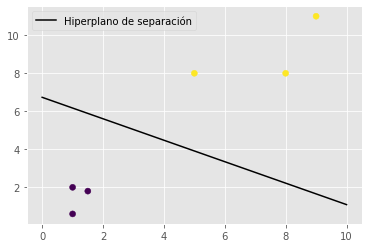

In [4]:
plt.plot(xx, yy, 'k-', label = "Hiperplano de separación")
plt.scatter(X, Y, c = target)
plt.legend()
plt.plot()

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC
#import make_bubles

model=SVC(kernel="linear", C = 1E10) 
model.fit(X,Y)

In [ ]:
##Función para pintar un Support Vector Classifier
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    print(model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    
    
    
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
plt_svc(model, plot_support=True)

In [ ]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s = 50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)
    
#############################################################################   
    
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right = 0.95, wspace = 0.1)
for ax_i, N, in zip(ax, [60, 120]):
    plot_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))

In [ ]:
## from ipwidgets import interact, fixed
## interact(plot_svm, N=[10,200], ax=fixed(None))

### Radial basis function

In [ ]:
#utilizar un kernel radial
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

#plot de la distribución y el clasificador
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

##  Support Vector Regression

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = np.sort(5*np.random.rand(200,1),axis=0)
Y = np.sin(X).ravel()
Y[::5] += 3*(0.5 - np.random.rand(40))

In [9]:
from sklearn.svm import SVR

C=1e3
svr_lin = SVR(kernel="linear", C=C)
svr_rbf = SVR(kernel="rbf", C=C, gamma=0.1)
svr_pol = SVR(kernel="poly", C=C, degree=3)

y_lin = svr_lin.fit(X,Y).predict(X)
y_rbf = svr_rbf.fit(X,Y).predict(X)
y_pol = svr_pol.fit(X,Y).predict(X)

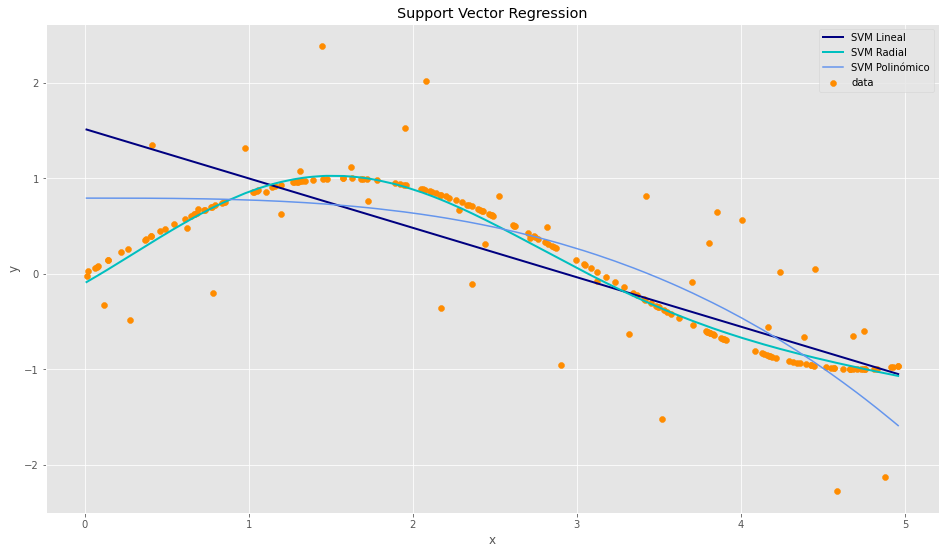

In [10]:
lw = 2
plt.figure(figsize=(16,9))
plt.scatter(X,Y,color="darkorange", label ="data")
plt.plot(X,y_lin, color="navy", lw = lw, label = "SVM Lineal")
plt.plot(X,y_rbf, color="c", lw=lw, label="SVM Radial")
plt.plot(X,y_pol, color="cornflowerblue", label="SVM Polinómico")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Support Vector Regression")
plt.legend()
plt.show()